<h1><center> Webscraping of Stock Price </center></h1>

## Objectives

Web scraping is an important approach to gather data. In this project, web scrapting was used to download the stock price data. Then the data were plotted. An organzing of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a href="https://bso/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Install Python Libraries</a>
            <ul>
                <li>Beautiful Soup</li>
                <li>LXML</li>
                <li>html5lib</li>
                <li>yfinance</li>
                <li>requests</li>
            </ul>
        </li>
     </ul>
    <ul>
        <li>
            <a href="https://filter/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">World Population Example</a>
            <ul>
                <li>Requests and Beautiful Soup</li>
                <li>Pandas read_html </li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a href="https://dscw/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork23455606-2021-01-01">Extract Stock Price</a>
            <ul>
                <li>Pands read_html extract data</li>
                <li>yfinance ticker extract data</li>
                <li>plot results</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

## 1. Install Python libraries

There are 7 popular Python web scraping libraries & tools. A good description of these 7 libraries can be found at __[Top 7 Python Web Scraping Libraries & Tools in 2023 ](https://research.aimultiple.com/python-web-scraping-libraries/)__.  For this project, Beautiful Soup, Lxml, Html5lib, Requests are used. 

In [1]:
!pip install bs4             #extracs data from HTML and XML files
!pip install lxml            #processing and parsing XML and HTML content
!pip install html5lib        #parsing HTML
!pip install requests        #HTTP calls to collect data from web sources
!pip install yfinance        #extract finance data
!pip install plotly;         #plot results

ERROR: Invalid requirement: '#extracs'
ERROR: Invalid requirement: '#processing'
ERROR: Invalid requirement: '#parsing'
ERROR: Invalid requirement: '#HTTP'
ERROR: Invalid requirement: '#extract'
ERROR: Invalid requirement: '#plot'


Import modules and functions

In [2]:
from bs4 import BeautifulSoup      #this module helps in web scarpping
import requests                    #help to download a web page
import pandas as pd                  #dataframe
import numpy as np                #array

## 2. World Population Example

Here uses a wikipedia web page about world pupulation to show how beautifulsoup works. 

In [3]:
#The below url contains html tables with data about world population
url = "https://en.wikipedia.org/wiki/World_population"

Before proceeding to scrape a web site, it is necessary to examine the contents, and the way data is organized on the website. Open the above url in a broser anad check the tables on the webpage.

In [4]:
#get the contents of the webpage in text format and store it
data = requests.get(url).text

In [5]:
#using Beautiful Soup parse the data
soup = BeautifulSoup(data, "html.parser")

In [6]:
#find all tables
tables = soup.find_all('table')

In [7]:
#length of tables tells how many tables were found
NL = len(tables)
print('There are ', NL, ' tables on this web page')

There are  30  tables on this web page


In [8]:
#we can select a table based on its attributes, sucha as table caption.
#here uses "10 most densly populate countries as an example
for index, table in enumerate(tables):
    if ("10 most densely populated countries" in str(table)):
        table_index = index
print(table_index)    

7


In [9]:
#we can print out the content of this table using prettify()
print(tables[table_index].prettify())

<table class="wikitable sortable" style="text-align:right">
 <caption>
  10 most densely populated countries
  <small>
   (with population above 5 million)
  </small>
  <sup class="reference" id="cite_ref-:10_107-0">
   <a href="#cite_note-:10-107">
    [102]
   </a>
  </sup>
 </caption>
 <tbody>
  <tr>
   <th scope="col">
    Rank
   </th>
   <th scope="col">
    Country
   </th>
   <th scope="col">
    Population
   </th>
   <th scope="col">
    Area
    <br/>
    <small>
     (km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
   <th scope="col">
    Density
    <br/>
    <small>
     (pop/km
     <sup>
      2
     </sup>
     )
    </small>
   </th>
  </tr>
  <tr>
   <td>
    1
   </td>
   <td align="left">
    <span class="flagicon">
     <span class="mw-image-border" typeof="mw:File">
      <span>
       <img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4

In [10]:
#create dataframe with header
population_data = pd.DataFrame(columns = ['Rank','Country','Population','Area','Density'])

#From above info, we see table content is tbody and data are rowed in tr
#in each row, data are saved as td. 
for row in tables[table_index].tbody.find_all('tr'):    # data in each row
    col = row.find_all('td')                            # data in columns
    if (col != []):
        rank = col[0].text 
        country = col[1].text.strip()
        population = col[2].text.strip()
        area = col[3].text.strip()
        Density = col[4].text.strip()
        population_data = pd.concat([population_data,pd.DataFrame([{'Rank':rank,'Country':country,'Population':population,'Area':area,'Density':Density}])],ignore_index = True)
population_data

,Rank,Country,Population,Area,Density
0,1,Singapore,"5,921,231",719,"8,235"
1,2,Bangladesh,"165,650,475","148,460","1,116"
2,3,Palestine[note 3][103],"5,223,000","6,025",867
3,4,Taiwan[note 4],"23,580,712","35,980",655
4,5,South Korea,"51,844,834","99,720",520
5,6,Lebanon,"5,296,814","10,400",509
6,7,Rwanda,"13,173,730","26,338",500
7,8,Burundi,"12,696,478","27,830",456
8,9,India,"1,389,637,446","3,287,263",423
9,10,Netherlands,"17,400,824","41,543",419


In [11]:
# We can use Pandas read_html function to create a DataFrame
data = pd.read_html(str(tables[7]),flavor='bs4')[0]

In [12]:
data

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][103],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,India,1389637446,3287263,423
9,10,Netherlands,17400824,41543,419


In [13]:
# another method to read in the same table is read_html function reading the whole web page
wiki_data = pd.read_html(url, flavor='bs4')

In [14]:
#let's see the number of all tables
NT = len(wiki_data)
print('Therea are ', NT, ' tabels')

Therea are  27  tabels


In [15]:
#Then we can pick the DataFrame we need
wiki_data[6]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][103],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,India,1389637446,3287263,423
9,10,Netherlands,17400824,41543,419


In [16]:
# or use match to select specific table we want
pd.read_html(url, match="10 most densely populated countries", flavor='bs4')[0]

,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][103],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,India,1389637446,3287263,423
9,10,Netherlands,17400824,41543,419


## 3. Stock Price

Here uses yfinance to get the stock price. As shown above, there are several methods to extract the data. Here uses pandas read_html to extact those data. 

In [17]:
import yfinance as yf

In [18]:
#Here use netflix stock price as example
#this website is from IBM Data Science online course. The data are not updated. 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"
Netflix_data = pd.read_html(url,flavor='bs4')

In [19]:
#show part of the data
Netflix_data[0].head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [20]:
ND = len(Netflix_data[0])
print('There are ',ND, ' rows of data in total')

There are  71  rows of data in total


Another way to extract stock data is using a Python library, yfinance. It allows to extract data for stocks returning data in a pandas dataframe

In [21]:
#Using the Ticker function to extract data. The stock name of Netflix is NFLX. 
Netflix_data_2 = yf.Ticker('NFLX')

In [22]:
#Using the ticker object and the function history extract stock information and save it in a dataframe
Netflix_data_2 = Netflix_data_2.history(period='max')

In [23]:
# Reset the index using reset_index(inplace = True) function on the stock dataframe and display the last five rows. We see the latest stock information.
Netflix_data_2.reset_index(inplace = True)
Netflix_data_2.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5447,2024-01-12 00:00:00-05:00,500.510010,500.790009,490.609985,492.160004,4996600,0.0,0.0
5448,2024-01-16 00:00:00-05:00,490.000000,494.149994,478.019989,481.239990,4679000,0.0,0.0
5449,2024-01-17 00:00:00-05:00,484.500000,486.209991,475.260010,480.329987,4894600,0.0,0.0
5450,2024-01-18 00:00:00-05:00,480.029999,485.769989,478.019989,485.309998,4054400,0.0,0.0
5451,2024-01-19 00:00:00-05:00,484.980011,485.670013,476.059998,482.950012,5665600,0.0,0.0


### Plot stock price

<Axes: title={'center': ' Historical Share Price'}, xlabel='Date', ylabel='Open Price($)'>

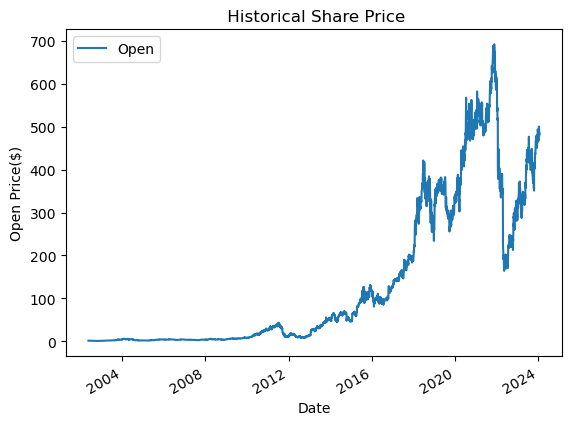

In [24]:
#plot the open price. 
Netflix_data_2.plot(x='Date', y='Open', title = ' Historical Share Price', xlabel='Date',ylabel='Open Price($)')

## Summary
As shown above, yfinance is much easier on extracting stock price. By changing company name in Ticker, stock data of that company can be downloaded. However, for other informations, such as world population, beautiful soup or pandas read_html is still convinient. 